# Train the Normalizing Flow Model

### Import Modules

In [16]:
# external modules
import torch
from torch.utils.data import DataLoader
from pytorch_lightning.trainer import Trainer
import numpy as np
from torch.distributions import Uniform
import matplotlib.pyplot as plt

# internal modules
from normalizing_flow_model import Flow1d
from dataset_NF import NumpyDataset

## 1) Generate Data

In [17]:
# data
dataset = NumpyDataset(2000)
dataloader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

## 2) Train the Model

In [24]:
flow = Flow1d(n_components=2)
trainer = Trainer(max_epochs=100)
trainer.fit(flow, dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
6         Trainable params
0         Non-trainable params
6         Total params
0.000     Total estimated model params size (MB)
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1938: PossibleUserWarning: The number of training samples (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_

Training: 0it [00:00, ?it/s]

## 3) Plot the Model

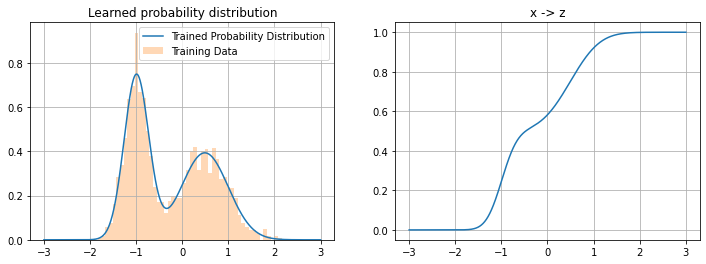

In [25]:
target_distribution = Uniform(0, 1)
x = np.linspace(-3,3,1000)
z, dz_by_dx = flow(torch.FloatTensor(x))
px = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().detach().numpy()

_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].grid(), axes[1].grid()
_ = axes[0].plot(x,px, label="Trained Probability Distribution")
_ = axes[0].hist(dataloader.dataset.array, bins=50, density=True, label="Training Data", alpha=0.3)
_ = axes[0].set_title('Learned probability distribution')
_ = axes[0].legend()

_ = axes[1].plot(x,z.detach().numpy())
_ = axes[1].set_title('x -> z')